<a href="https://colab.research.google.com/github/fran-0106/training-data-set-Iris/blob/main/Atividade_Pr%C3%A1tica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import seaborn
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


1 – Carregar o data set Iris (ele está disponível na sci-kit learn) e gerar
gráficos 2D escolhendo a cada gráfico 2 atributos dos 4 disponíveis na base
de dados, colorindo os elementos de acordo com sua classe.

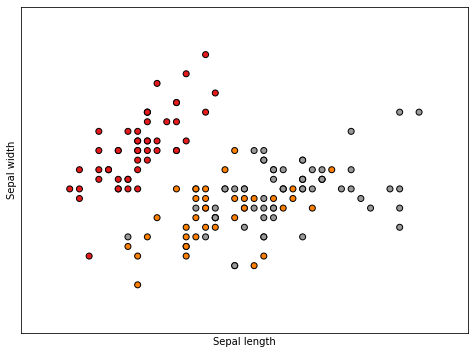

<Figure size 576x432 with 0 Axes>

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))




plt.show()

2- Usando a ferramenta tree da sci-kit learn, crie uma árvore de decisão
usando a base de dados. Além disso, gere uma visualização da árvore
gerada usando a ferramenta graphviz.

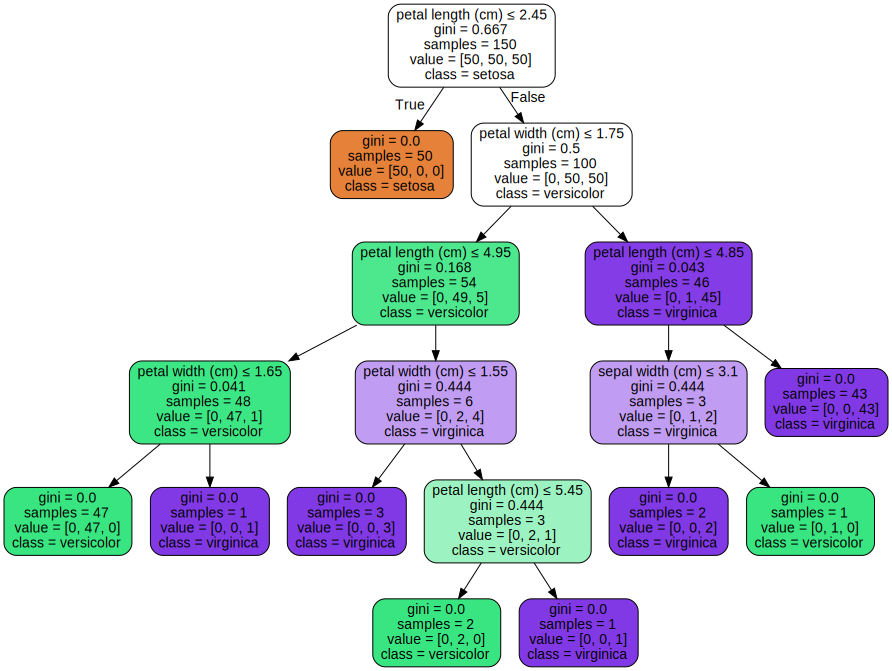

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
feature_names=iris.feature_names,  
class_names=iris.target_names,  
filled=True, rounded=True,  
special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

3- Crie um classificador naive bayes usando a função GaussianNB.

In [ ]:
dataset = datasets.load_iris()

model = GaussianNB()

model.fit(dataset.data, dataset.target)
print(model)

expected = dataset.target
predicted = model.predict(dataset.data)

print(metrics.classification_report(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



4- Compare o desempenho dos dois classificadores que criou. Para isso,
você deve separar a base de dados em duas bases menores: treinamento,
com 60% dos dados e teste, com 40%. Para isso, você pode usar a função
train_test_split, que divide automaticamente as duas bases de maneira
aleatória. Depois de dividida a base, você deve realizar o treinamento e o
teste dos dois modelos (árvore de decisão e naive bayes). Por fim, você
deve usar a função metrics.accuracy_score para verificar quanto do
resultado da classificação foi correto. Como a função train_test_split gera
bases de maneira aleatória, você deve executar tal procedimento 30 vezes
e por fim calcular a média dos resultados de cada modelo para definir qual
foi o modelo de melhor desempenho.

In [ ]:
i = 0
count1 = 0
count2 = 0 
for i in range(30) :
    x_train, x_test, y_train, y_test = train_test_split(X, y)

    tree1 = tree.DecisionTreeClassifier()
    clf1= tree1.fit(x_train,y_train)

    score_tree1 = clf1.score(x_test, y_test)
    count1 = count1 + score_tree1

    model1 = GaussianNB()
    clf2 = model1.fit(x_train,y_train)

    score_model1 = clf2.score(x_test, y_test)
    count2 = count2 + score_model1
    i = i + 1
average_score_tree1 = count1  / 30
average_score_model1 = count2 / 30

if average_score_tree1 > average_score_model1:
  print('Decision tree model is better. Average: ', average_score_tree1)
else:
  print('Naive Bayes model is better. Average: ', average_score_model1)

Naive Bayes model is better. Average:  0.9517543859649122
